# Google Play Store - Data Analysis

<p>Mobile apps are easy to create and can also be lucrative. Because of these two factors, more and more apps are being developed. In this notebook based on a project created by <a href='https://www.datacamp.com/'>DataCamp</a>, I will do a comprehensive analysis of the Android app market by comparing over thousands of apps in Google Play across different categories. I'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>

## 1. Google Play Store apps and reviews

<p>Let's take a look at the data, which can be downloaded on <a href='https://www.kaggle.com/lava18/google-play-store-apps'>Kaggle</a>, and consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>
<p>First of all, we will be taking the first steps such as importing pandas, reading the .csv file, dropping duplicates and getting a sample from the dataset.</p>

In [1]:
import numpy as np
import pandas as pd

# Read in dataset
apps_with_duplicates = pd.read_csv('data/apps.csv')

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates(subset = ['App'])

# Print the total number of apps
print('Total number of apps in the dataset =', len(apps))

# Have a look at a random sample of 15 rows
apps.sample(15)

Total number of apps in the dataset = 9660


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
526,NoBuffDating - Free Dating App,DATING,4.2,1939,Varies with device,"100,000+",Free,0,Mature 17+,Dating,"January 8, 2017",1.0.0,4.0 and up
1796,Mad Skills BMX 2,GAME,4.5,29940,80M,"1,000,000+",Free,0,Everyone,Action,"July 26, 2018",1.1.4,4.1 and up
6407,WebComics,COMICS,4.8,33783,6.4M,"1,000,000+",Free,0,Teen,Comics,"July 28, 2018",1.3.34,4.1 and up
2297,Hospitalist Handbook,MEDICAL,4.8,12,18M,"1,000+",Paid,$19.99,Everyone,Medical,"June 5, 2017",6.0.4,4.1 and up
4163,Offroad G-Class 2018,FAMILY,4.4,7715,28M,"500,000+",Free,0,Everyone,Simulation,"June 29, 2018",1.7,4.1 and up
9662,EO LAC,LIFESTYLE,NaN,0,18M,10+,Free,0,Everyone,Lifestyle,"January 17, 2017",1.1,4.1 and up
2811,"Face Filter, Selfie Editor - Sweet Camera",PHOTOGRAPHY,4.7,142634,22M,"10,000,000+",Free,0,Everyone,Photography,"July 6, 2018",1.5.1,4.4 and up
1026,Events High - Meet Your City!,EVENTS,4.2,3200,Varies with device,"100,000+",Free,0,Everyone 10+,Events,"June 23, 2018",Varies with device,Varies with device
9723,What's Your Story?™ ft Charmed,FAMILY,4.1,39661,47M,"1,000,000+",Free,0,Teen,Role Playing,"August 2, 2018",1.10.4,5.0 and up
3425,Backgrounds HD (Wallpapers),PERSONALIZATION,4.6,2390185,Varies with device,"100,000,000+",Free,0,Teen,Personalization,"August 4, 2018",Varies with device,Varies with device


## 2. Data cleaning
<p>Data cleaning is one of the most essential tasks in any data science project. This is usually the longest step to take.</p>
<p>By looking at a random sample of the dataset rows (from the analysis above), we observe that some entries in the columns like <code>Installs</code> and <code>Price</code> have a few special characters due to the way the numbers have been represented. This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Ideally, as their names suggest, we would want these columns to contain only digits from [<code>0-9</code>].</p>
<p>Hence, we now proceed to clean our data. Specifically, the special characters <code>,</code> and <code>+</code> present in <code>Installs</code> column and <code>$</code> present in <code>Price</code> column need to be removed.</p>
<p>It is always a good practice to print a summary of the DataFrame after completing data cleaning. The <code>info()</code> method will be used to achieve this.</p>

In [2]:
import warnings
warnings.filterwarnings('ignore')

# List of characters to remove
chars_to_remove = ['+', ',', '$']

# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB
None


<p>Since we'll be using <code>Installs</code>, <code>Size</code>, <code>Rating</code> and <code>Price</code> most of the time, it's nice to check if their types are the way we want, that is, the numeric types.</p>
<p>Unfortunately, the column <code>Size</code> also has characters different from numbers, as we see the <code>k</code> and <code>M</code> at the end of the numbers and the string <code>'Varies with device'</code>. Thus, it will be impossible to convert them to a numeric type. Also, remember that the <code>k</code> numbers are actually in kbytes, so we need to divide them by <code>1000</code> to work with the megabytes, represented by the letter <code>M</code>.
<p>Because of these matters presented above, two different DataFrames will be created: one only with kbytes apps rows and another with megabytes apps rows and the string <code>'Varies with device'</code>.
<p>We will be treating each one separately and then put them back together in one DataFrame again.</p>
<p>Also, it's worth checking if there are other misleading values in the columns, as the value <code>Everyone</code> appears in the column <code>Price</code> once. Since there is just one row like that, we can drop it without too much concern. However, if there are more misleading values in more rows, other approaches may be necessary. 

In [3]:
# First, replace k by an empty string
apps_replace_k = apps[apps['Size'].str.endswith('k')].replace('k', '', regex = True)
# Change data type to numeric
apps_replace_k['Size'] = apps_replace_k['Size'].astype(float)
# Divide by 1000 to convert since we want to work with kbytes and megabytes together, round by 1
apps_replace_k['Size'] = (apps_replace_k['Size'] / 1000).round(1)

apps_replace_k

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,0.2,100000,Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,0.0,100000,Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,0.1,10000000,Free,0,Everyone,Communication,"September 2, 2015",0.1.100944346,4.0.3 and up
450,Caller ID +,COMMUNICATION,4.0,9498,0.1,1000000,Free,0,Everyone,Communication,"June 7, 2016",5.28.0,2.3 and up
458,GO Notifier,COMMUNICATION,4.2,124346,0.7,10000000,Free,0,Everyone,Communication,"July 6, 2014",2.8,2.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10763,FP Разбитый дисплей,FAMILY,4.5,922,0.6,50000,Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
10764,FP Transportation,AUTO_AND_VEHICLES,NaN,1,0.9,1,Free,0,Everyone,Auto & Vehicles,"March 9, 2018",10.0.0,4.0 and up
10798,Word Search Tab 1 FR,FAMILY,NaN,0,1.0,50,Paid,1.04,Everyone,Puzzle,"February 6, 2012",1.1,3.0 and up
10832,FR Tides,WEATHER,3.8,1195,0.6,100000,Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


In [4]:
# To create the second DataFrame, we create a list of indexes from the values with k
k_indexes = apps[apps['Size'].str.endswith('k')].index.values.tolist()
# Drop the rows using the list of indexes so we have a DataFrame with only megabytes apps
apps_wo_k = apps.drop(k_indexes)

apps_wo_k

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
# Take 'Price' and check if all values are numeric (string 'Everyone' is present)
apps_wo_k['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '7.99', '5.99', '2.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '1.50', '19.99', '15.99', '33.99', '74.99',
       '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88', '25.99',
       '399.99', '17.99', '400.00', '3.02', '1.76', '4.84', '4.77',
       '1.61', '2.50', '1.59', '13.99', '299.99', '379.99', '37.99',
       '18.99', '389.99', '19.90', '8.49', '1.75', '14.00', '4.85',
       '46.99', '109.99', '154.99', '3.08', '2.59', '1.96', '19.40',
       '3.90', '4.59', '15.46', '3.04', '4.29', '2.60', '3.28', '4.60',
       '28.99', '10.99', '2.95', '2.90', '1.97', '200.00', '89.99',
       '2.56', '30.99', '3.61', '394.99', '1.26', 'Everyone', '6.49',
       '1.20'], dtype=object)

In [6]:
# Isolate the rows with wrong values
apps_wo_k[apps_wo_k['Price'] == 'Everyone'] # Notice the 'Installs', 'Type' and 'Size' columns which also have misleading values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
# Replace M by an empty string in the second DataFrame created
apps_wo_k['Size'] = apps_wo_k['Size'].apply(lambda x: x.replace('M', ''))
# Replace the string by NaN
apps_wo_k = apps_wo_k.replace('Varies with device', np.nan, regex=True)
# Drop de row with inconsistent values
apps_wo_k = apps_wo_k.drop(10472)
# Convert data type to numeric
apps_wo_k['Size'] = apps_wo_k['Size'].astype(float)

apps_wo_k

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",NaN,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",NaN,NaN


In [8]:
# Combine both DataFrames created and assign it to our original variable apps
apps = pd.concat([apps_wo_k, apps_replace_k])
# Reset the indexes since many of our rows were dropped
apps = apps.reset_index(drop=True)

apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",NaN,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,FP Разбитый дисплей,FAMILY,4.5,922,0.6,50000,Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
9655,FP Transportation,AUTO_AND_VEHICLES,NaN,1,0.9,1,Free,0,Everyone,Auto & Vehicles,"March 9, 2018",10.0.0,4.0 and up
9656,Word Search Tab 1 FR,FAMILY,NaN,0,1.0,50,Paid,1.04,Everyone,Puzzle,"February 6, 2012",1.1,3.0 and up
9657,FR Tides,WEATHER,3.8,1195,0.6,100000,Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


## 3. Correcting data types
<p>From the previous task, it can be noticed that <code>Installs</code> and <code>Price</code> were categorized as <code>object</code> data type (<code>Size</code> was also <code>object</code>, but we already treated it) as we would like. This is because these two columns originally had mixed input types: digits and special characters.</p>
<p>The four features that will be used most frequently henceforth are <code>Installs</code>, <code>Size</code>, <code>Rating</code> and <code>Price</code>. While <code>Size</code> and <code>Rating</code> are both <code>float</code> (i.e. purely numerical data types), <code>Installs</code> and <code>Price</code> will need to be worked on to make them numeric.</p>

In [9]:
# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype(float)

# Convert Price to float data type
apps['Price'] = apps['Price'].astype(float)

# Checking dtypes of the apps dataframe
print(apps.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


## 4. Exploring app categories
<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>
<p>We will see that there are <code>33</code> unique app categories present in our dataset. <em>Family</em> and <em>Game</em> apps have the highest market prevalence. Interestingly, <em>Tools</em>, <em>Business</em> and <em>Medical</em> apps are also at the top.</p>

In [10]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories =', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories = 33


## 5. Distribution of app ratings
<p>After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.</p>
<p>From the research, the average volume of ratings across all app categories is <code>4.17</code>. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.</p>

In [11]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating =', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating = 4.173243045388001


## 6. Size and price of an app
<p>Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience the mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free apps over paid apps?</li>
</ul>
<p>From the research, the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. Also, the vast majority of apps price themselves under \$10.</p>

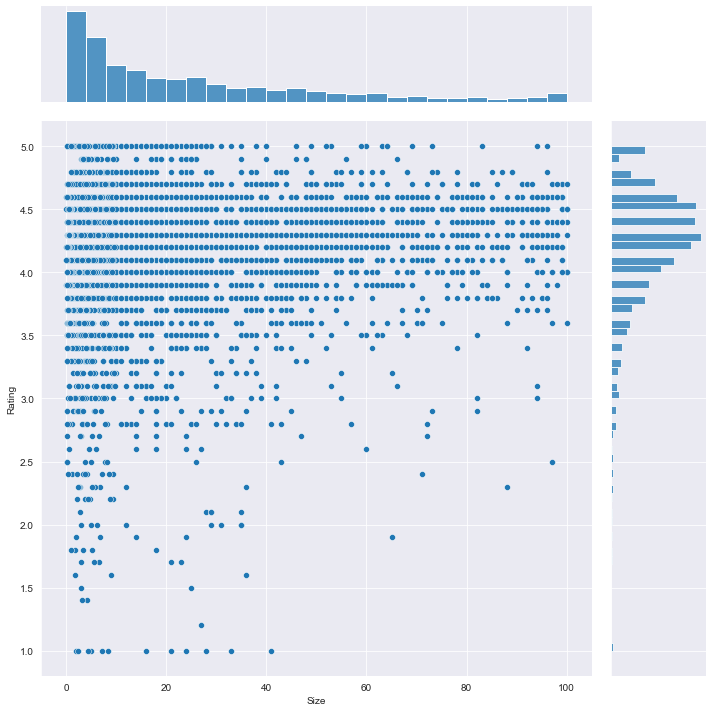

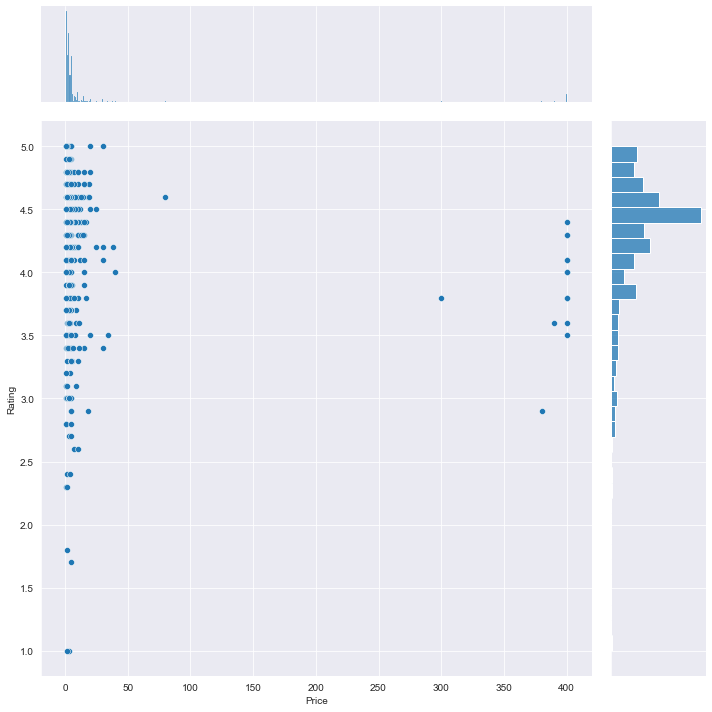

In [12]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps.dropna(subset=['Rating', 'Size'])

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], height = 10)

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'], height = 10)

## 7. Relation between app category and app price
<p>How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.</p>
<p>Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that <code>Medical</code> and <code>Family</code> apps are the most expensive in average. Some medical apps extend even up to \$80! All game apps are reasonably priced below \$20. Notice that some <code>Finance</code> and <code>Lifestyle</code> apps also have outliers, reaching absurdly high prices.</p>

,Category,App,Price
3289,FAMILY,most expensive app (H),399.99
3425,LIFESTYLE,💎 I'm rich,399.99
3428,LIFESTYLE,I'm Rich - Trump Edition,400.00
4321,LIFESTYLE,I am rich,399.99
4323,FAMILY,I am Rich Plus,399.99
4324,LIFESTYLE,I am rich VIP,299.99
4325,FINANCE,I Am Rich Premium,399.99
4326,LIFESTYLE,I am extremely Rich,379.99
4327,FINANCE,I am Rich!,399.99
4330,FAMILY,I Am Rich Pro,399.99


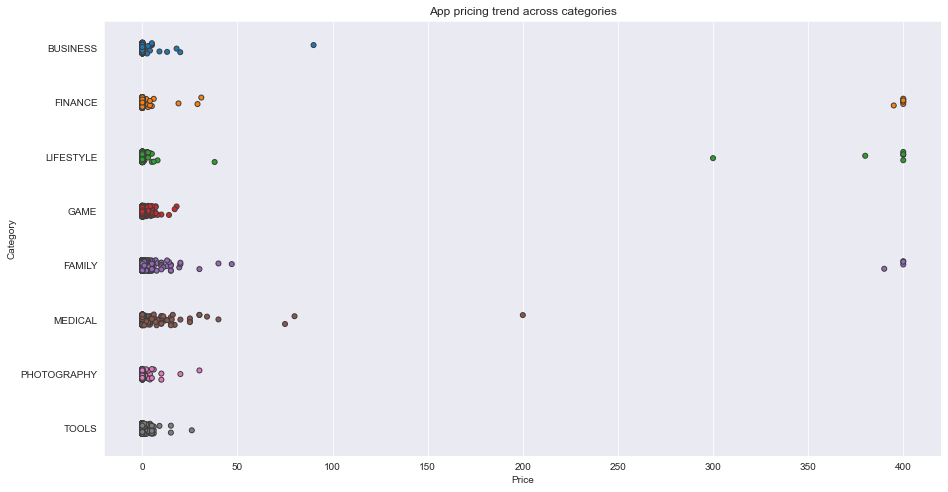

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

## 8. Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some developers may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some of them even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization for a better understanding of our dataset.</p>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

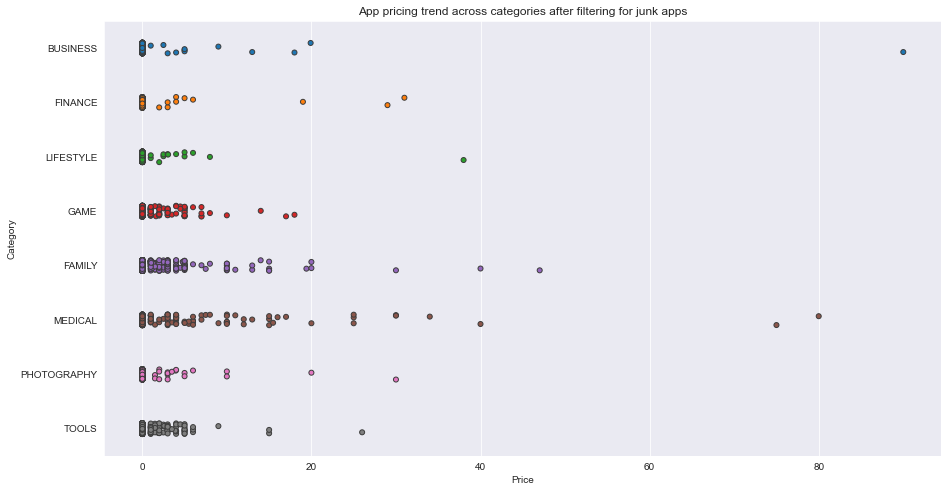

In [14]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = apps_under_100['Price'], y = apps_under_100['Category'], jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 9. Popularity of paid apps vs free apps
<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download;</li>
<li>Main source of income often comes from advertisements;</li>
<li>Often created by companies that have other products and the app serves as an extension of those products;</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it;</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as one would have expected!</p>

In [15]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 10. Sentiment analysis of user reviews
<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.</p>
<p>In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.</p>

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

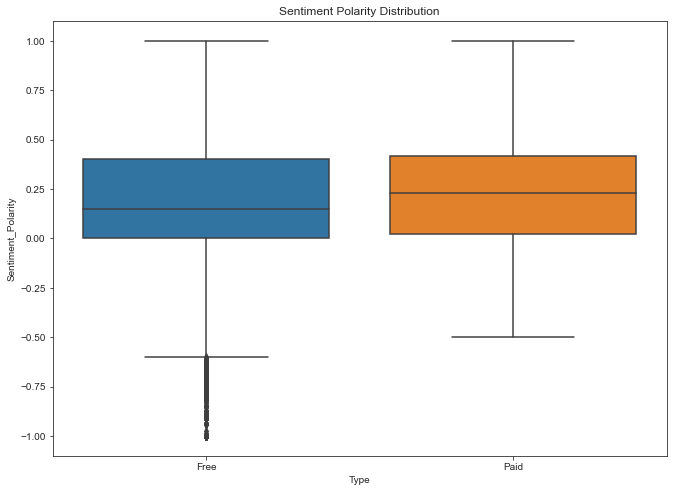

In [16]:
# Load user_reviews.csv
reviews_df = pd.read_csv('data/user_reviews.csv')

# Join the two dataframes
merged_df = apps.merge(reviews_df)

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Reviews'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = merged_df['Type'], y = merged_df['Sentiment_Polarity'], data = merged_df)
ax.set_title('Sentiment Polarity Distribution')